<a href="https://colab.research.google.com/github/macarov13/Analitica-de-negocios/blob/main/Reto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Metodos de Agrupamiento**

**Reto 3**

Maria Antonia Caro V.


0. Cargar librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Prestamo interbibliotecario
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix

1. Cargar archivos

<Figure size 1000x1000 with 0 Axes>

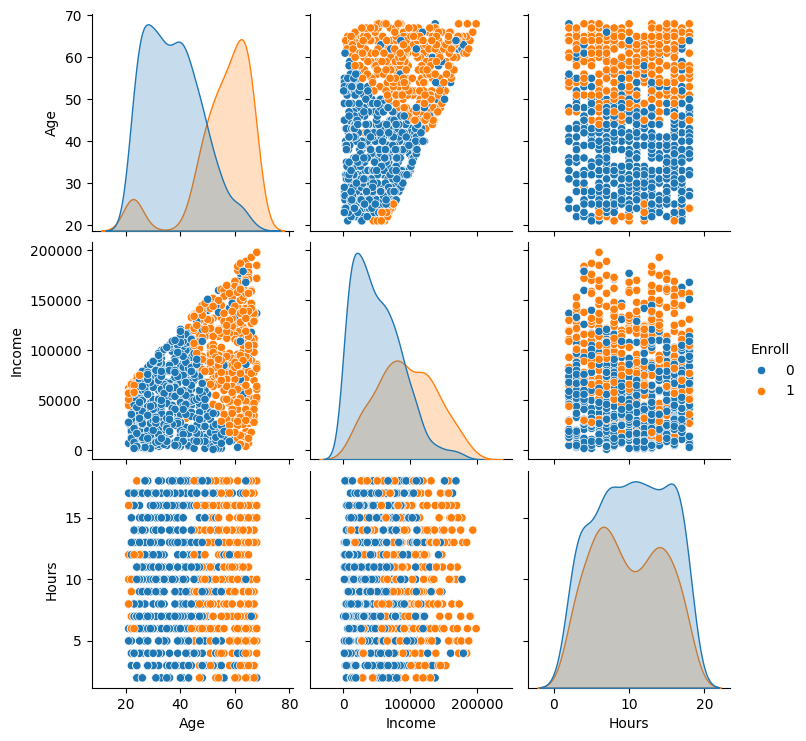

,Age,Income,Hours,Enroll
Age,1.000000,0.450562,-0.040133,0.644033
Income,0.450562,1.000000,-0.018196,0.476372
Hours,-0.040133,-0.018196,1.000000,-0.048184
Enroll,0.644033,0.476372,-0.048184,1.000000


In [ ]:
nxl="/content/3. BD1-GymData_Int.xlsx"
XDB= pd.read_excel(nxl, sheet_name=0)                          # X data base
XDB=XDB.dropna()
XDB.head(5)

#1. Se seleccionan las variables de interes
XDB=XDB[["Age","Income","Hours", "Enroll"]]

#2. Determinar la correlacion entre las variables y su impacto sobre la variable de salida

plt.figure(figsize=(10,10))
sns.pairplot(XDB, hue="Enroll")
plt.show()

#3. La correlación numérica es
XDB.corr()



2. Implementar model KNN

La matriz de confusion es:
: [[538  59]
 [145 258]]
La exactitud es: 0.796
La sensibilidad es: 0.6401985111662531
La especificidad es: 0.9011725293132329
El posible cliente comprara la membresia o no: [0]


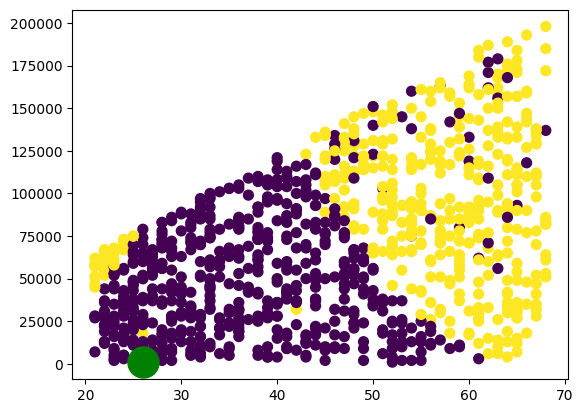

In [ ]:
#1. Construimos el modelo KNN
XD=np.array(XDB[["Age","Income","Hours"]])   #Variables de entrada
Yd=np.array(XDB["Enroll"])                   #Variable de salida

Knn = KNeighborsClassifier(n_neighbors=10)   #Evalua 10 vecinos
Knn.fit(XD,Yd)

ydp=Knn.predict(XD)

#2. Evaluamos el modelo KNN
cm=confusion_matrix(Yd,ydp)
print("La matriz de confusion es:\n:",cm)

VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]

Exactitud = (VP+VN)/(VP+VN+FP+FN)
Exactitud
Sensibilidad = VP/(VP+FN)
Sensibilidad
Especificidad = VN/(VN+FP)
Especificidad

print("La exactitud es:",Exactitud)
print("La sensibilidad es:",Sensibilidad)
print("La especificidad es:",Especificidad)     #Negativo

#3. Evaluamos posible cliente
XDp=np.array([[26, 800, 15]])           #Donde se encuentra este paciente dentro de los datos
ydpp=Knn.predict(XDp)
print("El posible cliente comprara la membresia o no:",ydpp)

#Donde se encuentra el paciente
plt.figure()

plt.scatter(XD[:,0],XD[:,1],c=Yd,s=50,cmap="viridis")      #Grafico de correlacion
plt.scatter(XDp[:,0],XDp[:,1],marker="o", s=500, facecolors="green")
plt.show()

3. Construcción del K-Means (montoncitos de datos o Clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Donde quedo el primer solicitante 3
Donde quedo el segundo solicitante 3
Donde quedo el tercer solicitante 1


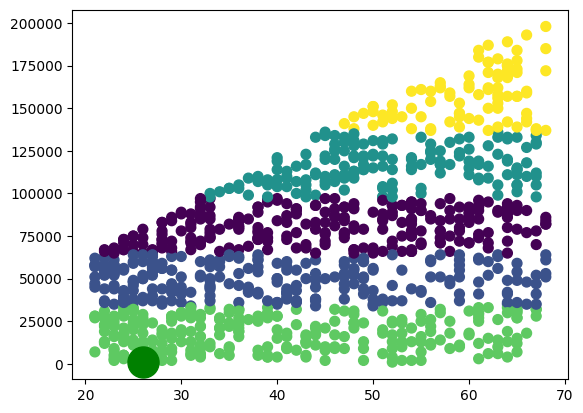

La persona va a comprar la membresia o no: [3]


El numero de negados para el cluster 1 es: 130
El numero de aprobados para el cluster 1 es: 116
El porcentaje de aprobados para el cluster 1 es: 0.4715447154471545
El porcentaje de negados para el cluster 1 es: 0.5284552845528455


El numero de negados para el cluster 2 es: 172
El numero de aprobados para el cluster 2 es: 66
El porcentaje de aprobados para el cluster 2 es: 0.2773109243697479
El porcentaje de negados para el cluster 2 es: 0.7226890756302521


El numero de negados para el cluster 3 es: 50
El numero de aprobados para el cluster 3 es: 107
El porcentaje de aprobados para el cluster 3 es: 0.6815286624203821
El porcentaje de negados para el cluster 3 es: 0.3184713375796178


El numero de negados para el cluster 4 es: 230
El numero de aprobados para el cluster 4 es: 41
El porcentaje de aprobados para el cluster 4 es: 0.15129151291512916
El porcentaje de negados para el cluster 4 es: 0.8487084870848709


El numero de negados para

In [ ]:
np.random.seed(42) #Para que a todos nos de el mismo modelo

mkn=KMeans(n_clusters=5, init='random', random_state=42)
mkn.fit(XD, Yd)
labels=mkn.labels_ #Donde quedaron clasificados los datos
print("Donde quedo el primer solicitante", labels[0,])
print("Donde quedo el segundo solicitante", labels[1,])
print("Donde quedo el tercer solicitante", labels[2,])

ydp2=mkn.predict(XD)

plt.scatter(XD[:,0], XD[:,1], c=labels, s=50, cmap='viridis')
plt.scatter(XDp[:,0], XDp[:,1], marker='o', s=500, facecolors='green')
plt.show()

#Donde quede yo?
XDP=np.array([[26, 800, 15]])
ydpp2=mkn.predict(XDP)
print("La persona va a comprar la membresia o no:", ydpp2)
print()
print()

#Cual es el porcentaje de preaprobados y negados del cluster 1
c20=len(np.where((labels==0) & (Yd==0))[0])
print("El numero de negados para el cluster 1 es:", c20)
c21=len(np.where((labels==0) & (Yd==1))[0])
print("El numero de aprobados para el cluster 1 es:",c21)
print("El porcentaje de aprobados para el cluster 1 es:", c21/(c20+c21))
print("El porcentaje de negados para el cluster 1 es:", c20/(c20+c21))
print()
print()

#Cual es el porcentaje de preaprobados y negados del cluster 2?
c20=len(np.where((labels==1) & (Yd==0))[0])
print("El numero de negados para el cluster 2 es:", c20)
c21=len(np.where((labels==1) & (Yd==1))[0])
print("El numero de aprobados para el cluster 2 es:",c21)
print("El porcentaje de aprobados para el cluster 2 es:", c21/(c20+c21))
print("El porcentaje de negados para el cluster 2 es:", c20/(c20+c21))
print()
print()

#Cual es el porcentaje de preaprobados y negados del cluster 3
c20=len(np.where((labels==2) & (Yd==0))[0])
print("El numero de negados para el cluster 3 es:", c20)
c21=len(np.where((labels==2) & (Yd==1))[0])
print("El numero de aprobados para el cluster 3 es:",c21)
print("El porcentaje de aprobados para el cluster 3 es:", c21/(c20+c21))
print("El porcentaje de negados para el cluster 3 es:", c20/(c20+c21))
print()
print()

#Cual es el porcentaje de preaprobados y negados del cluster 4
c20=len(np.where((labels==3) & (Yd==0))[0])
print("El numero de negados para el cluster 4 es:", c20)
c21=len(np.where((labels==3) & (Yd==1))[0])
print("El numero de aprobados para el cluster 4 es:",c21)
print("El porcentaje de aprobados para el cluster 4 es:", c21/(c20+c21))
print("El porcentaje de negados para el cluster 4 es:", c20/(c20+c21))
print()
print()

#Cual es el porcentaje de preaprobados y negados del cluster 5
c20=len(np.where((labels==4) & (Yd==0))[0])
print("El numero de negados para el cluster 5 es:", c20)
c21=len(np.where((labels==4) & (Yd==1))[0])
print("El numero de aprobados para el cluster 5 es:",c21)
print("El porcentaje de aprobados para el cluster 5 es:", c21/(c20+c21))
print("El porcentaje de negados para el cluster 5 es:", c20/(c20+c21))
print()
print()

#Cual es la caracteristica sociodemografica de cada cluster
clusters=mkn.cluster_centers_
print("Las caracteristicas de cada cluster son:\n", clusters)

4. Analisis

Las diferentes variables que hacen parte de la base de datos son: **age**, la cual indica la edad del cliente; **income**, la cual representa los ingresos del cliente; **hours**, indica la cantidad de horas dedicadas al ejercicio; y **enroll** la cual es la variable de salida e ndica si el cliente se inscribió en el gimnasio (1) o no (0).

Es posible evidenciar que la variable que mejor caracteriza la inscripción es **age**. Y que segun las variables de entrada y de salida, las variables tienen una mayor correlación entre ellas son **age y enroll**.

Gracias a el modelo KNN fue posible concluir que: **la exactitud** es de un 79.6%, **la sensibilidad** es de un 64% por lo que significa que identifica correctamente un porcentaje moderado de personas que posiblemente se inscriban, y **la especificidad** que es de un 90.1% lo cual nos dice que tiene un buen desempeño para identificar personas que no se inscribirian.


Finalmente, segun los modelos KNN y KMeans, una persona con las siguintes caracteristicas: 26 años, ingresos de 800 y 15 horas de ejercicio, no se inscribirá en el gimnasio.

En el modelo K-Means agrupamos la informacion en 5 clusters y es posible observar que los grupos tienen diferencias en edad, ingresos y horas de ejercicio.

Es posible afirmar que el cluster 0 es el que posee la mayor edad para el modelo KMeans.
El cluster que presenta el mayor numero de personas que van a suscribirse al gym es el cluster 0.
El cluster que presenta la menor cantidad de personas es el cluster 4.


